In [19]:
import numpy as np
import pandas as pd
from keras import Input
from keras.engine import Model
from keras.layers import Conv2D, Flatten, Dense, Lambda, Dropout
from keras.optimizers import Adam

from data_utils import load_data, IMAGE_SHAPE
from position import POS_NUM

LEARNING_RATE = 1e-4

inputs = Input(shape=IMAGE_SHAPE)
values = Lambda(lambda x: x / 127.5 - 1.0)(inputs)

conv_layer_1 = Conv2D(24, (5, 5), strides=(2, 2), padding='same', activation='relu')
values = conv_layer_1(values)

conv_layer_2 = Conv2D(36, (5, 5), strides=(2, 2), padding='same', activation='relu')
values = conv_layer_2(values)

conv_layer_3 = Conv2D(48, (5, 5), strides=(2, 2), padding='same', activation='relu')
values = conv_layer_3(values)

conv_layer_4 = Conv2D(64, (3, 3), padding='same', activation='relu')
values = conv_layer_4(values)

conv_layer_5 = Conv2D(64, (3, 3), padding='same', activation='relu')
values = conv_layer_5(values)

# values = dropout(values, 0.5)
values = Dropout(0.5)(values)

values = Flatten()(values)

values = Dense(100, activation='relu')(values)
values = Dense(50, activation='relu')(values)
values = Dense(10, activation='relu')(values)

outputs = Dense(POS_NUM)(values)

model = Model(inputs=inputs, outputs=outputs)

adam = Adam(lr=LEARNING_RATE)
model.compile(loss='mean_squared_error', optimizer=adam)

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 66, 200, 3)        0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 33, 100, 24)       1824      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 17, 50, 36)        21636     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 25, 48)         43248     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 9, 25, 64)         27712     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 25, 64)         36928     
__________

In [20]:
import pos_detect_model

model.load_weights(pos_detect_model.saved_h5_name)

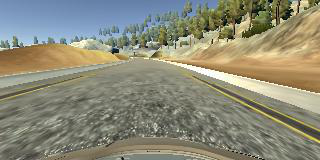

In [23]:
from PIL import Image

img = Image.open('/Volumes/CPSC587DATA/RecordedImg20171206231757/20171206230154.460.jpg')         
img

(66, 200, 3)


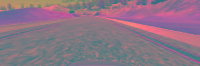

In [24]:
from data_utils import process_image

img_array = process_image(img)
Image.fromarray(img_array)

In [25]:
model.predict(np.expand_dims(img_array, axis=0))

array([[-0.0219549 ,  1.0543716 , -0.05035214]], dtype=float32)

In [39]:
from keras import backend as K


def visualize_conv(layer):
    m_inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(m_inputs, [layer.output])

    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(np.expand_dims(img_array, 0))
    convolutions = np.squeeze(convolutions)

    print('Shape of conv:', convolutions.shape)

    n = convolutions.shape[-1]
    n = int(np.ceil(np.sqrt(n)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12, 8))
    for i in range(convolutions.shape[-1]):
        ax = fig.add_subplot(n, n, i+1)
        ax.imshow(convolutions[:, :, i], cmap='gray')
        # ax.imshow(convolutions[:, :, i])
    return fig

Shape of conv: (33, 100, 24)


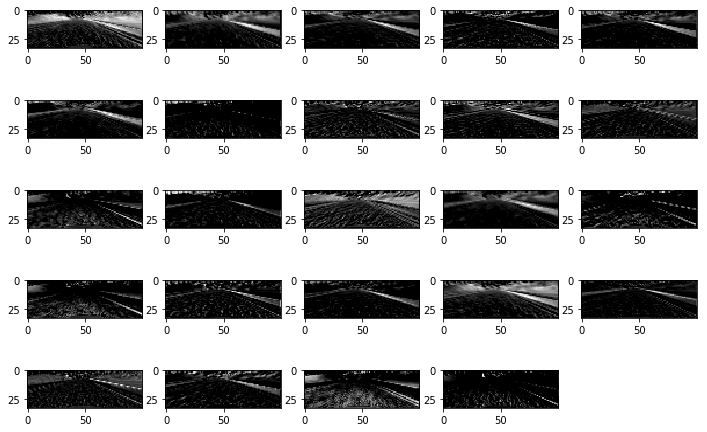

In [40]:
import matplotlib.pyplot as plt

plt.close('all')
visualize_conv(conv_layer_1)

Shape of conv: (17, 50, 36)


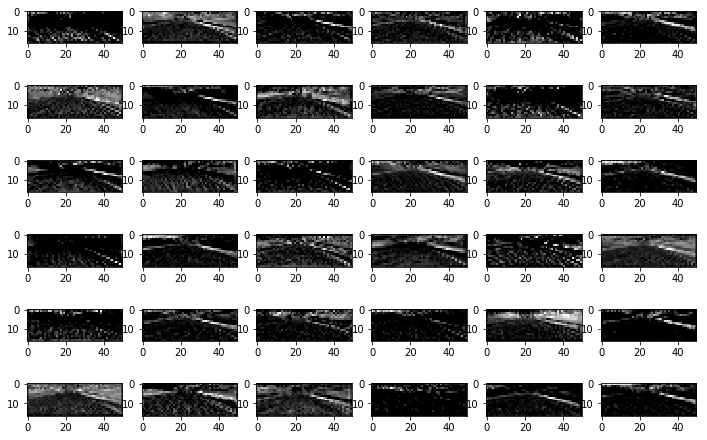

In [41]:
plt.close('all')
visualize_conv(conv_layer_2)

Shape of conv: (9, 25, 48)


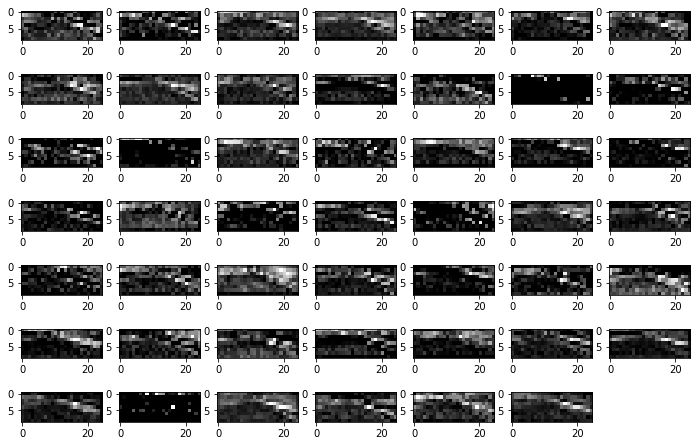

In [42]:
plt.close('all')
visualize_conv(conv_layer_3)

Shape of conv: (9, 25, 64)


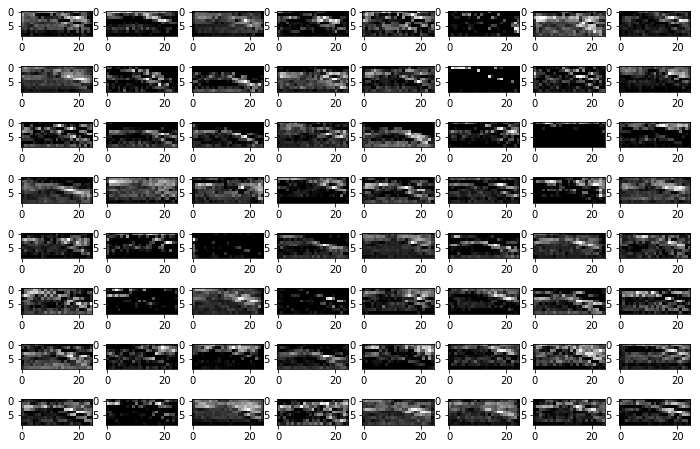

In [43]:
plt.close('all')
visualize_conv(conv_layer_4)

Shape of conv: (9, 25, 64)


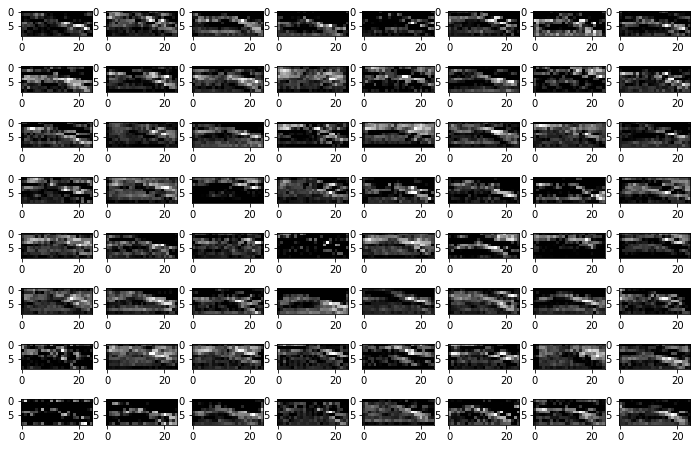

In [44]:
plt.close('all')
visualize_conv(conv_layer_5)